In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# used to check the version of the SkLearn library
import sklearn
print(sklearn.__version__)

0.23.1


In [2]:
%matplotlib inline

# setting the maximum amount of rows and columns Jupyter will print. If the
# second parameter is changed changed to 'None', you can see all the columns and rows.
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# creating a pandas dataframe from the data
df = pd.read_csv('./Third Component Machine Learning/all_categorical.csv')

# checking the number of empty cells
print(df.isnull().sum())

age15-30                                       0
age31-49                                       0
age50-64                                       0
age>=65                                        0
Male                                           0
Smoker                                        62
symp_Cough                                     0
symp_General malaise                           0
symp_Fatigue                                   0
symp_Myalgia or arthralgia                     0
symp_Dyspnoea                                  0
symp_Diarrhoea                                 0
symp_Headache                                  0
symp_Anosmia                                   0
symp_Dysgeusia                                 0
symp_Sore throat                               0
symp_Blocked nose                              0
symp_usea or vomiting                          0
symp_Sputum production                         0
symp_Chills                                    0
symp_Asthenia       

In [3]:
# obtaining patient percentage for each outcome
print(str(round(len(df[df['evol_Death'] == 1])/len(df) * 100, 2)) + '% of patients recorded died.')
print(str(round(len(df[df['evol_Death'] == 0])/len(df) * 100, 2)) + '% of patients recorded did not die\n')

print(str(round(len(df[df['evol_ICU_admission'] == 1])/len(df) * 100, 2)) + '% of patients recorded were admitted to ICU.')
print(str(round(len(df[df['evol_ICU_admission'] == 0])/len(df) * 100, 2)) + '% of patients recorded were not admitted to ICU.\n')

print(str(round(len(df[df['evol_Hospitalization'] == 1])/len(df) * 100, 2)) + '% of patients recorded were admitted to a hospital.')
print(str(round(len(df[df['evol_Hospitalization'] == 0])/len(df) * 100, 2)) + '% of patients recorded were not admitted to a hospital.\n')

print(str(round(len(df[df['evol_Recovered'] == 1])/len(df) * 100, 2)) + '% of patients recorded recovered.')
print(str(round(len(df[df['evol_Recovered'] == 0])/len(df) * 100, 2)) + '% of patients recorded did not recover.\n')

5.59% of patients recorded died.
94.41% of patients recorded did not die

13.04% of patients recorded were admitted to ICU.
86.96% of patients recorded were not admitted to ICU.

49.07% of patients recorded were admitted to a hospital.
50.93% of patients recorded were not admitted to a hospital.

14.91% of patients recorded recovered.
85.09% of patients recorded did not recover.



In [4]:
# gender percentage
print(str(round(len(df[df['Male'] == 1])/len(df) * 100, 2)) + '% of patients recorded were male.')
print(str(round(len(df[df['Male'] == 0])/len(df) * 100, 2)) + '% of patients recorded were female.\n')

50.0% of patients recorded were male.
50.0% of patients recorded were female.



In [5]:
# will iterate though all the dataframe columns and select the features that are not equal to our target label.
# you can modify this to also leave out "commmon" features already found to find "rarer" features that contribute
# to each outcome
def select_features():
    features = []
    
    for i in df.columns:
        if i != 'evol_Death' and i != 'evol_ICU_admission' and i != 'evol_Hospitalization' and i != 'evol_Recovered':
            features.append(i)
                
    return features

# will iterate through the data selected features picked by the chi2 algorithm and print out the name of said features
def get_features(selected, df):
    features = []
    
    print('\u0332'.join('\nBest features for accuracy:'))
    for i in selected:
        print(df.columns[i])
        features.append(df.columns[i])
            
    return features
    
# creating a features matrix and a copy of the matrix to use later after fitting occurs    
X = df[select_features()]
X_copy = X

# creating the KNNImputer and applying it to the features matrix created above. This will
# cause the features matrix to become a numpy array
imputer = KNNImputer(n_neighbors=int(math.sqrt(len(X))), weights="distance")
X = imputer.fit_transform(X)

# creating the Logistic Regression model that will be used to predict and obtain fpr,tpr,prediction probability and accuracy
model = LogisticRegression(max_iter=7000)
# we want the best features that contribute to the outcomes. chi2 does that, k = 9 represents the number of features we want
# to choose. Changing k will return that amount of features selected by chi2
kBest = SelectKBest(chi2, k=9)

# Death


̲B̲e̲s̲t̲ ̲f̲e̲a̲t̲u̲r̲e̲s̲ ̲f̲o̲r̲ ̲a̲c̲c̲u̲r̲a̲c̲y̲:
age>=65
comor_Hypertension
comor_Autoimmune disease
comor_Cerebrovascular disease
comor_Tuberculosis
comp_Adult_respiratory_distress_syndrome
comp_Sepsis
comp_Multiorgan_failure
creatinine>1.5

Accuracy for Death:  0.9538461538461539

Area under the curve:  0.9569892473118279


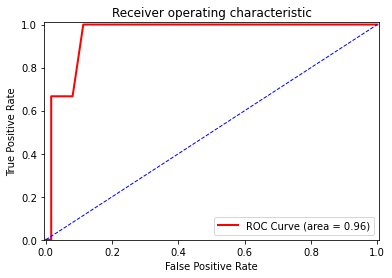

In [6]:
y_death = df['evol_Death']

# performing chi2 test on the features matrix and target label. This will return a numpy array
new_X_death = kBest.fit_transform(X,y_death)
# finding and returning the indices of the features selected by the chi2 test
cols = kBest.get_support(indices=True)
# getting the name of the columns from the indices returned. Can be stored in a dictionary for each outcome to try and
# determine the shared features between all the outcomes.
get_features(cols, X_copy)

# splitting our data into a training and testing set.
X_train,X_test,y_train,y_test = train_test_split(new_X_death,y_death,test_size=0.20,random_state=42)
# fitting our training features matrix and training label target to our Logistic Regression model
model.fit(X_train,y_train)

# predicting the outcome of our model
y_pred=model.predict(X_test)

# determining the accuracy of our model
print(f'\nAccuracy for Death: ',metrics.accuracy_score(y_test, y_pred))

# determining the probability of each feature being a 1 or 0
y_predict_prob_lr = model.predict_proba(X_test)
# getting the fpr and tpr from the testing target label and the probability
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
# print('\u0332'.join('\nFalse Positive Rate:\n'), fpr)
# print('\u0332'.join('True Positive Rate:\n'), tpr)

# calculating the area under the curve using the false positive and true positive rates
AUC = metrics.auc(fpr, tpr)
print('\nArea under the curve: ', AUC)

# plotting the fpr and tpr on a graph
plt.figure()

# will plot the curve and create what the legend will display
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# plotting the random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# setting the ranges of the axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# ICU Admission


̲B̲e̲s̲t̲ ̲f̲e̲a̲t̲u̲r̲e̲s̲ ̲f̲o̲r̲ ̲a̲c̲c̲u̲r̲a̲c̲y̲:
comor_Diabetes
xray_Bilateral pulmory infiltrates
comp_Any complication
comp_Adult_respiratory_distress_syndrome
treat_Oxygen_therapy
treat_Intravenous_antibiotics
treat_Glucocorticoids
treat_Tocilizumab
treat_Interferon

Accuracy for ICU Admission:  0.8307692307692308

Area under the curve:  0.805921052631579


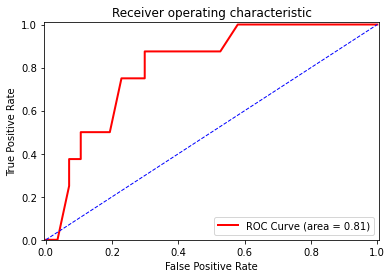

In [7]:
y_icu = df['evol_ICU_admission']

# performing chi2 test on the features matrix and target label. This will return a numpy array
new_X_icu = kBest.fit_transform(X,y_icu)
# finding and returning the indices of the features selected by the chi2 test
cols = kBest.get_support(indices=True)
# getting the name of the columns from the indices returned. Can be stored in a dictionary for each outcome to try and
# determine the shared features between all the outcomes.
get_features(cols, X_copy)

# splitting our data into a training and testing set.
X_train,X_test,y_train,y_test = train_test_split(new_X_icu,y_icu,test_size=0.20,random_state=42)
# fitting our training features matrix and training label target to our Logistic Regression model
model.fit(X_train,y_train)

# predicting the outcome of our model
y_pred=model.predict(X_test)

# determining the accuracy of our model
print(f'\nAccuracy for ICU Admission: ',metrics.accuracy_score(y_test, y_pred))

# determining the probability of each feature being a 1 or 0
y_predict_prob_lr = model.predict_proba(X_test)
# getting the fpr and tpr from the testing target label and the probability
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
# print('\u0332'.join('\nFalse Positive Rate:\n'), fpr)
# print('\u0332'.join('True Positive Rate:\n'), tpr)

# calculating the area under the curve using the false positive and true positive rates
AUC = metrics.auc(fpr, tpr)
print('\nArea under the curve: ', AUC)

# plotting the fpr and tpr on a graph
plt.figure()

# will plot the curve and create what the legend will display
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# plotting the random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# setting the ranges of the axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Hospitalization


̲B̲e̲s̲t̲ ̲f̲e̲a̲t̲u̲r̲e̲s̲ ̲f̲o̲r̲ ̲a̲c̲c̲u̲r̲a̲c̲y̲:
age>=65
comor_Hypertension
xray_Bilateral pulmory infiltrates
comp_Any complication
comp_Pneumonia
treat_Hydroxychloroquine
treat_Azithromycin
treat_Lopivir/Ritovir
treat_Oxygen_therapy

Accuracy for Hospitalization:  0.8

Area under the curve:  0.8572106261859582


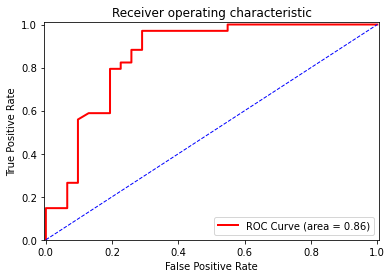

In [8]:
y_hospital = df['evol_Hospitalization']

# performing chi2 test on the features matrix and target label. This will return a numpy array
new_X_hospital = kBest.fit_transform(X,y_hospital)
# finding and returning the indices of the features selected by the chi2 test
cols = kBest.get_support(indices=True)
# getting the name of the columns from the indices returned. Can be stored in a dictionary for each outcome to try and
# determine the shared features between all the outcomes.
get_features(cols, X_copy)

# splitting our data into a training and testing set.
X_train,X_test,y_train,y_test = train_test_split(new_X_hospital,y_hospital,test_size=0.20,random_state=42)
# fitting our training features matrix and training label target to our Logistic Regression model
model.fit(X_train,y_train)

# predicting the outcome of our model
y_pred=model.predict(X_test)

# determining the accuracy of our model
print(f'\nAccuracy for Hospitalization: ',metrics.accuracy_score(y_test, y_pred))

# determining the probability of each feature being a 1 or 0
y_predict_prob_lr = model.predict_proba(X_test)
# getting the fpr and tpr from the testing target label and the probability
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
# print('\u0332'.join('\nFalse Positive Rate:\n'), fpr)
# print('\u0332'.join('True Positive Rate:\n'), tpr)

# calculating the area under the curve using the false positive and true positive rates
AUC = metrics.auc(fpr, tpr)
print('\nArea under the curve: ', AUC)

# plotting the fpr and tpr on a graph
plt.figure()

# will plot the curve and create what the legend will display
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# plotting the random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# setting the ranges of the axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Recovered


̲B̲e̲s̲t̲ ̲f̲e̲a̲t̲u̲r̲e̲s̲ ̲f̲o̲r̲ ̲a̲c̲c̲u̲r̲a̲c̲y̲:
exam_Tachypnoea
oxy_saturation<92
comor_Hypertension
comor_Chronic obstructive pulmory disease
comor_Depression
comp_Any complication
comp_Pneumonia
treat_Oxygen_therapy
c-reac>10

Accuracy for Recovered:  0.8923076923076924

Area under the curve:  0.6551724137931034


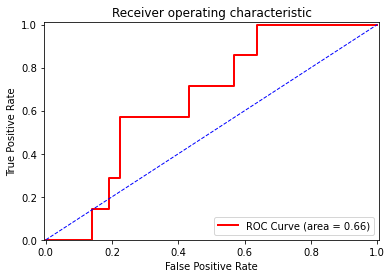

In [9]:
y_recovered = df['evol_Recovered']

# performing chi2 test on the features matrix and target label. This will return a numpy array
new_X_recovered = kBest.fit_transform(X,y_recovered)
# finding and returning the indices of the features selected by the chi2 test
cols = kBest.get_support(indices=True)
# getting the name of the columns from the indices returned. Can be stored in a dictionary for each outcome to try and
# determine the shared features between all the outcomes.
get_features(cols, X_copy)

# splitting our data into a training and testing set.
X_train,X_test,y_train,y_test = train_test_split(new_X_recovered,y_recovered,test_size=0.20,random_state=42)
# fitting our training features matrix and training label target to our Logistic Regression model
model.fit(X_train,y_train)

# predicting the outcome of our model
y_pred=model.predict(X_test)

# determining the accuracy of our model
print(f'\nAccuracy for Recovered: ',metrics.accuracy_score(y_test, y_pred))

# determining the probability of each feature being a 1 or 0
y_predict_prob_lr = model.predict_proba(X_test)
# getting the fpr and tpr from the testing target label and the probability
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
# print('\u0332'.join('\nFalse Positive Rate:\n'), fpr)
# print('\u0332'.join('True Positive Rate:\n'), tpr)

# calculating the area under the curve using the false positive and true positive rates
AUC = metrics.auc(fpr, tpr)
print('\nArea under the curve: ', AUC)

# plotting the fpr and tpr on a graph
plt.figure()

# will plot the curve and create what the legend will display
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# plotting the random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# setting the ranges of the axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()